<a href="https://colab.research.google.com/github/anandyadav819/kaggle-notebooks/blob/main/Indian_Food_101_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Indian Food 101 Dataset from Kaggle

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os
import wordcloud

In [ ]:
pd.options.display.html.border = 2

In [ ]:
drive.mount("gdrive/")
os.chdir("gdrive/My Drive/Daily Data Analysis/")

Mounted at gdrive/


## Load data

In [ ]:
data = pd.read_csv("Datasets/Indian Food 101/indian_food.csv")

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB
None


In [ ]:
data.head(5)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [ ]:
print("Total different dishes: {}".format(data.name.nunique()))

Total different dishes: 255


In [ ]:
data['state'] = data['state'].apply(lambda x: x if x!="-1" else "Unknown State")
data['flavor_profile'] = data['flavor_profile'].apply(lambda x: x if x!="-1" else "Unknown Flavor")

Balu shahi Boondi Gajar ka halwa Ghevar Gulab jamun Imarti Jalebi Kaju katli Kalakand Kheer Laddu Lassi Nankhatai Petha Phirni Rabri Sheera Singori Sohan halwa Sohan papdi Chhena jalebi Chhena kheeri Chhena poda Cham cham Kheer sagar Ledikeni Lyangcha Malapua Mihidana Misti doi Pantua Pithe Rasabali Ras malai Rasgulla Sandesh Adhirasam Ariselu Bandar laddu Chikki Dharwad pedha Double ka meetha Gavvalu Kakinada khaja Kuzhi paniyaram Mysore pak Obbattu holige Palathalikalu Poornalu Pongal Pootharekulu Qubani ka meetha Sheer korma Unni Appam Kajjikaya Anarsa Basundi Dhondas Doodhpak Mahim halwa Modak Shankarpali Shrikhand Sutar feni Chak Hao Kheer Aloo gobi Aloo tikki Aloo matar Aloo methi Aloo shimla mirch Bhatura Bhindi masala Chana masala Chapati Chole bhature Daal baati churma Daal puri Dal makhani  Dal tadka Dum aloo Poha Fara Kachori Kadai paneer Kadhi pakoda Karela bharta Khichdi Kofta Kulfi falooda Lauki ke kofte Lauki ki subji Litti chokha Makki di roti sarson da saag Misi roti M

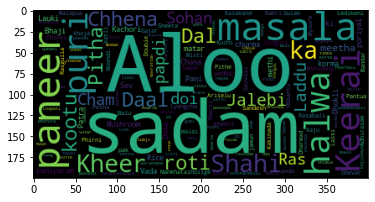

In [ ]:
text = " ".join(data[data['diet']=="vegetarian"]['name'].tolist())
print(text)
wc = wordcloud.WordCloud(collocations=False).generate(text)
plt.imshow(wc)

In [ ]:
def create_ingredient_series(list_of_ingredients):
  all_ingredients = ",".join(list_of_ingredients).split(',')
  all_ingredients = [i.lower().strip() for i in all_ingredients]
  #print(all_ingredients)
  all_ingredients_s = pd.Series(all_ingredients)
  ing_c = all_ingredients_s.groupby(all_ingredients_s).aggregate('count').sort_values(ascending=False)
  return ing_c

In [ ]:
d_ing = []
for d in list(set(data['diet'])):
  diet_ing = create_ingredient_series(data[data['diet']==d]['ingredients'].tolist())
  d_ing.append(diet_ing)

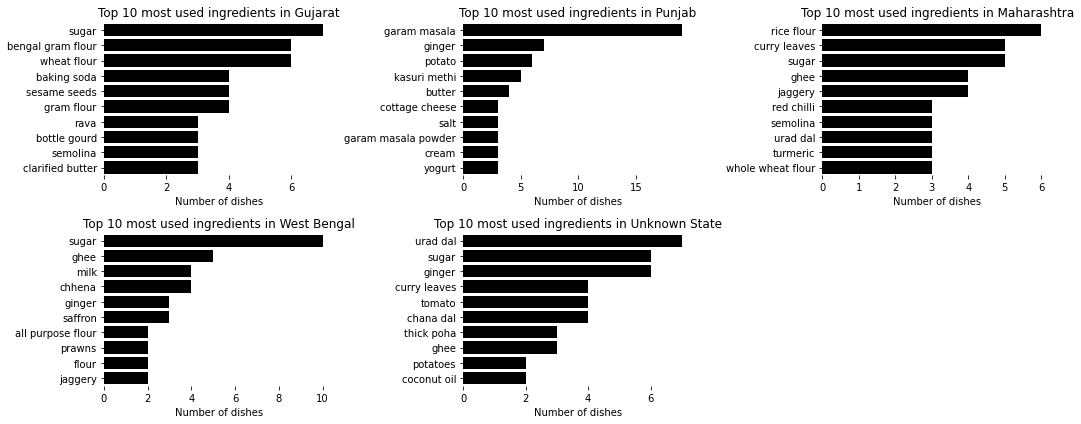

In [ ]:
st_ing = []
st_lst = data['name'].groupby(data['state']).aggregate('count').sort_values(ascending=False).index[:5]
for f in st_lst:
  stat_ing = create_ingredient_series(data[data['state']==f]['ingredients'].tolist())
  st_ing.append(stat_ing)

fig = plt.figure(figsize=(15, 6))
for i in range(len(st_ing)):
  fig.add_subplot(2, 3, i+1)
  sns.barplot(y=st_ing[i].index[:10], x=st_ing[i].values[:10], color="black")
  sns.despine(left=True, bottom=True)
  plt.title("Top 10 most used ingredients in {}".format(st_lst[i]))
  plt.xlabel("Number of dishes")
fig.tight_layout()
plt.show()

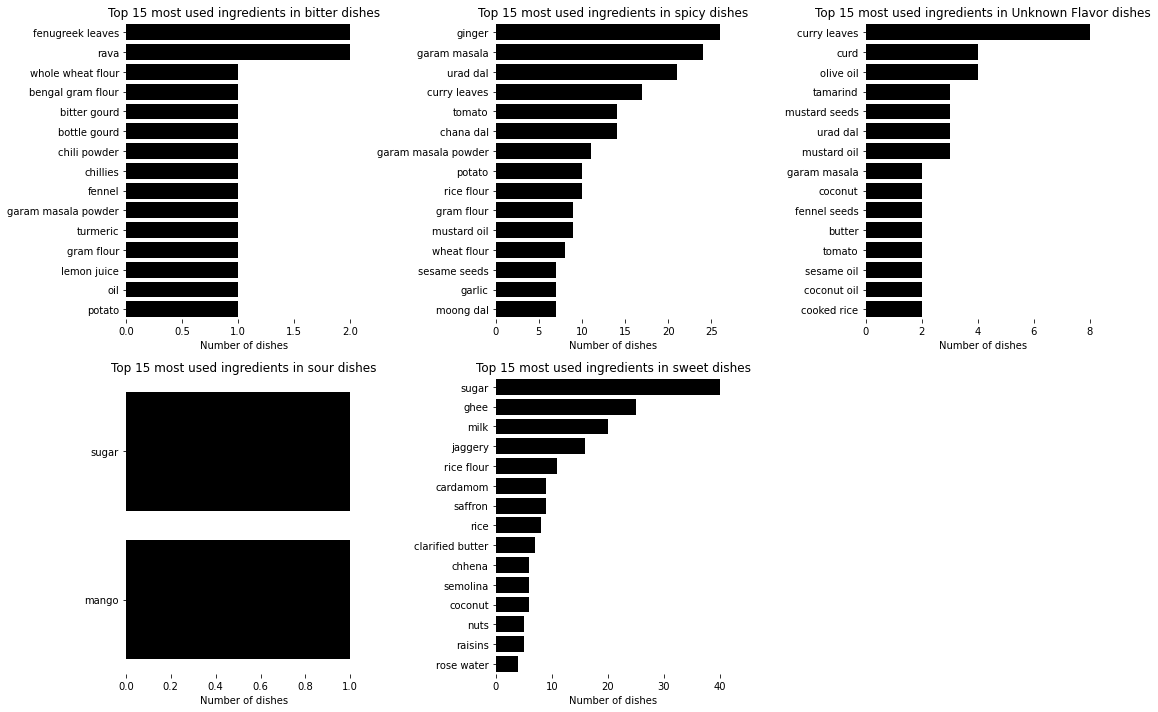

In [ ]:
f_ing = []
flav_lst = list(set(data['flavor_profile']))
for f in flav_lst:
  flv_ing = create_ingredient_series(data[data['flavor_profile']==f]['ingredients'].tolist())
  f_ing.append(flv_ing)

fig = plt.figure(figsize=(16, 10))
for i in range(len(f_ing)):
  fig.add_subplot(2, 3, i+1)
  sns.barplot(y=f_ing[i].index[:15], x=f_ing[i].values[:15], color="black")
  sns.despine(left=True, bottom=True)
  plt.title("Top 15 most used ingredients in {} dishes".format(flav_lst[i]))
  plt.xlabel("Number of dishes")
fig.tight_layout()
plt.show()

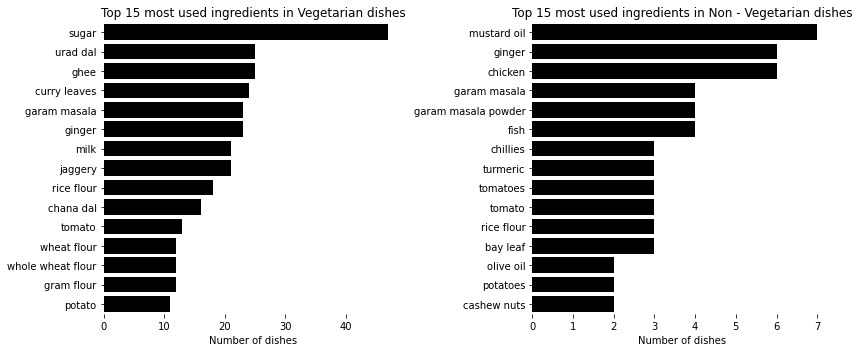

In [ ]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1, 2, 1)
sns.barplot(y=d_ing[1].index[:15], x=d_ing[1].values[:15], color="black")
sns.despine(left=True, bottom=True)
plt.title("Top 15 most used ingredients in Vegetarian dishes")
plt.xlabel("Number of dishes")
fig.add_subplot(1, 2, 2)
sns.barplot(y=d_ing[0].index[:15], x=d_ing[0].values[:15], color="black")
sns.despine(left=True, bottom=True)
plt.title("Top 15 most used ingredients in Non - Vegetarian dishes")
plt.xlabel("Number of dishes")
fig.tight_layout()
plt.show()

In [ ]:
all_ingredients = ",".join(data.ingredients.tolist()).split(',')
all_ingredients_s = pd.Series(all_ingredients, name='All Ingredients')
total_unique_ingredients = list(set(all_ingredients))

In [ ]:
print("Unique ingredients count : {}".format(len(total_unique_ingredients)))

Unique ingredients count : 426


In [ ]:
ing_c = all_ingredients_s.groupby(all_ingredients_s).aggregate('count').sort_values()
lbls = [i.strip() for i in ing_c.index]


[]

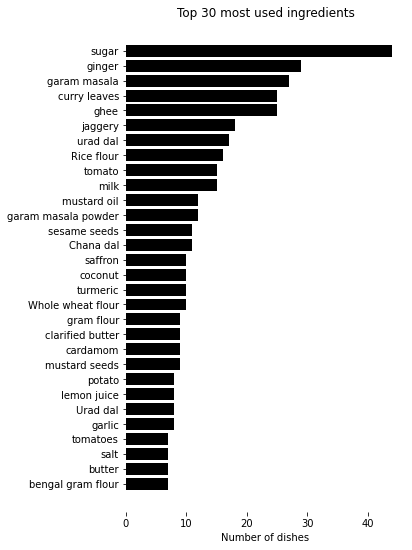

In [ ]:
fig = plt.figure(figsize=(5, 9))
sns.barplot(y=lbls[::-1][:30], x=ing_c.values[::-1][:30], color="black")
sns.despine(left=True, bottom=True)
plt.title("Top 30 most used ingredients")
plt.xlabel("Number of dishes")
plt.plot()

In [ ]:
data.head(5)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [ ]:
data.sort_values(by='prep_time').tail(5)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
128,Dosa,"Chana dal, urad dal, whole urad dal, blend ric...",vegetarian,360,90,spicy,snack,Unknown State,South
130,Idli,"Split urad dal, urad dal, idli rice, thick poh...",vegetarian,360,90,spicy,snack,Unknown State,South
29,Misti doi,"Milk, jaggery",vegetarian,480,30,sweet,dessert,West Bengal,East
155,Puttu,"Brown rice flour, sugar, grated coconut",vegetarian,495,40,Unknown Flavor,main course,Kerala,South
114,Pindi chana,"Fennel, tea bags, tomato, kasuri methi, cinnamon",vegetarian,500,120,spicy,main course,Punjab,North


In [ ]:
name_ingredients = data[['name', 'ingredients']].copy(deep=True)
name_ingredients['ingredients_cnt'] = name_ingredients['ingredients'].apply(lambda x:len(x.split(',')))

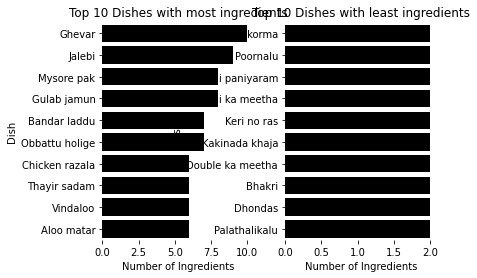

In [ ]:
temp_s = name_ingredients[['name','ingredients_cnt']].sort_values('ingredients_cnt')
fig = plt.figure(figsize=(6, 4))
fig.add_subplot(1, 2, 1)
sns.barplot(x='ingredients_cnt', y='name', data=temp_s[::-1][:10], color='black')
sns.despine(left=True, bottom=True)
plt.xlabel('Number of Ingredients')
plt.ylabel('Dish')
plt.title('Top 10 Dishes with most ingredients')

fig.add_subplot(1, 2, 2)
sns.barplot(x='ingredients_cnt', y='name', data=temp_s[:10], color='black')
sns.despine(left=True, bottom=True)
plt.xlabel('Number of Ingredients')
plt.ylabel('Dish')
plt.title('Top 10 Dishes with least ingredients')
plt.show()

In [ ]:
state_cnt = data['name'].groupby(data['state']).aggregate('count').sort_values()
flv_cnt = data['name'].groupby(data['flavor_profile']).aggregate('count').sort_values()
course_cnt = data['name'].groupby(data['course']).aggregate('count').sort_values()
diet_cnt = data['name'].groupby(data['diet']).aggregate('count').sort_values()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


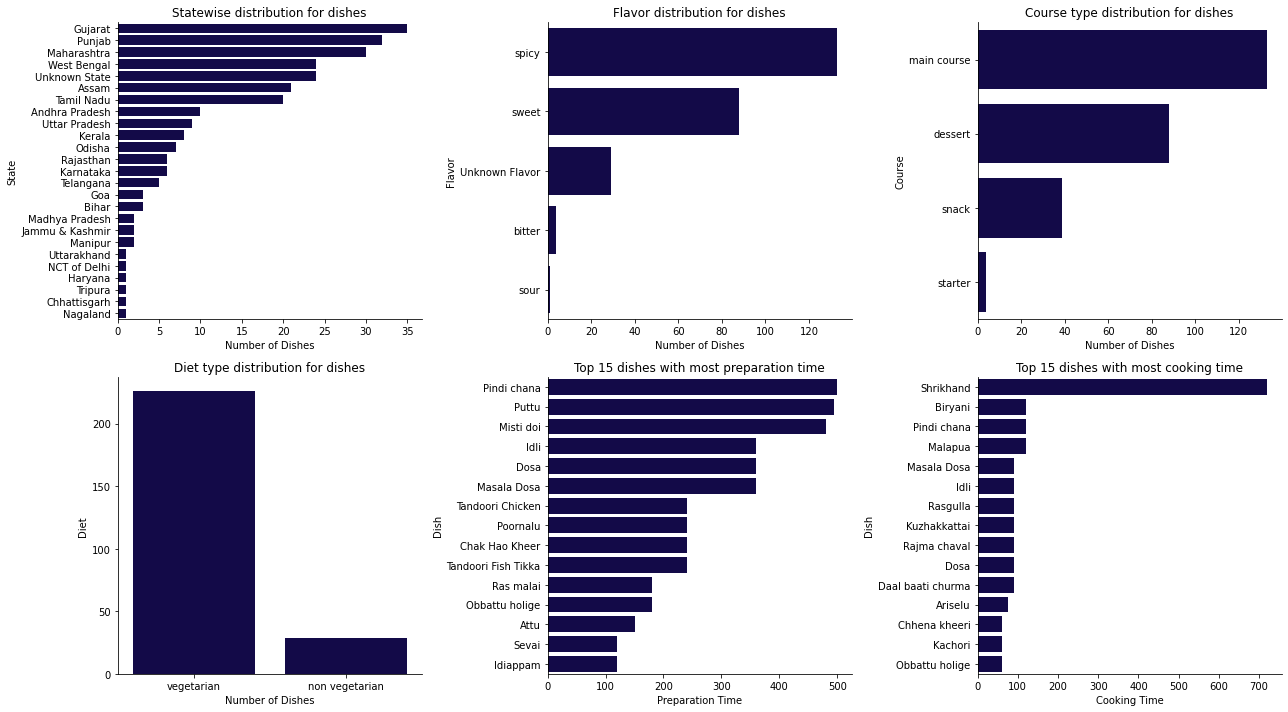

In [ ]:
# Distribution of dishes
clr = '#0c0052'
fig = plt.figure(figsize=(18, 10))
fig.add_subplot(2,3,1)
sns.barplot(y=state_cnt.index[::-1], x=state_cnt[::-1], color=clr)
sns.despine(right=True, top=True)
plt.xlabel('Number of Dishes')
plt.ylabel('State')
plt.title("Statewise distribution for dishes")

fig.add_subplot(2,3,2)
sns.barplot(y=flv_cnt.index[::-1], x=flv_cnt[::-1], color=clr)
sns.despine(right=True, top=True)
plt.xlabel('Number of Dishes')
plt.ylabel('Flavor')
plt.title("Flavor distribution for dishes")

fig.add_subplot(2,3,3)
sns.barplot(y=flv_cnt.index[::-1], x=flv_cnt[::-1], color=clr)
sns.despine(right=True, top=True)
plt.xlabel('Number of Dishes')
plt.ylabel('Flavor')
plt.title("Flavor distribution for dishes")

fig.add_subplot(2,3,3)
sns.barplot(y=course_cnt.index[::-1], x=course_cnt[::-1], color=clr)
sns.despine(right=True, top=True)
plt.xlabel('Number of Dishes')
plt.ylabel('Course')
plt.title("Course type distribution for dishes")

fig.add_subplot(2,3,4)
sns.barplot(x=diet_cnt.index[::-1], y=diet_cnt[::-1], color=clr)
sns.despine(right=True, top=True)
plt.xlabel('Number of Dishes')
plt.ylabel('Diet')
plt.title("Diet type distribution for dishes")

fig.add_subplot(2,3,5)
sns.barplot(y='name', x='prep_time', data=data[['name', 'prep_time']].sort_values(by='prep_time')[::-1][:15], color=clr)
sns.despine(right=True, top=True)
plt.ylabel('Dish')
plt.xlabel('Preparation Time')
plt.title("Top 15 dishes with most preparation time")


fig.add_subplot(2,3,6)
sns.barplot(y='name', x='cook_time', data=data[['name', 'cook_time']].sort_values(by='cook_time')[::-1][:15], color=clr)
sns.despine(right=True, top=True)
plt.ylabel('Dish')
plt.xlabel('Cooking Time')
plt.title("Top 15 dishes with most cooking time")

fig.tight_layout()
plt.show()


In [ ]:
data.head(5)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [ ]:
import matplotlib.patches as patches

In [ ]:
def create_wordcloud(lst_of_str, fig_size=(8, 8)):
  pass

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


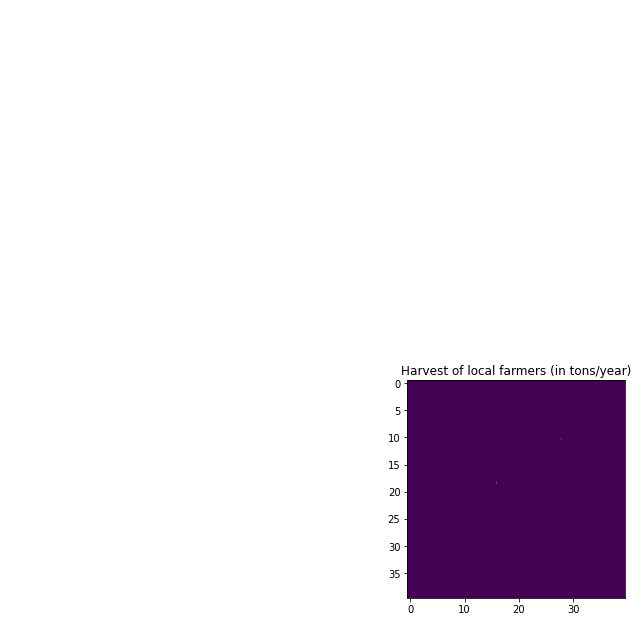

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(np.zeros((40, 40), np.uint8))
items = ["text"+str(i) for i in range(20)]
item_freq = np.random.uniform(size=(20,))
item_freq_norm = item_freq - item_freq.max()
base_font_size = 20
gap_offset = 5
k=0

x_i, y_i = np.random.choice(np.linspace(3, 32, num=20), size=20), np.random.choice(np.linspace(1, 36, num=20), size=20)
x_y = [(i, j) for i,j in zip(x_i, y_i)]




#for i,j in zip(x_i, y_i):
#for xy in set(x_y):

x, y = list(range(40)), list(range(40))
px, py = [1/len(items)]*len(items), [1/len(items)]*len(items)
for i in range(len(items)):
  xi, yi = np.random.choice(x, size=1, p=p), np.random.choice(y, size=1, p=p)
  rot = np.random.choice(["horizontal", "vertical"], size=1, p=[0.7, 0.3])
  fsize = int(item_freq[k]*base_font_size)
  text = ax.text(int(xy[0]), int(xy[1]), items[k],
                       ha="center", va="center", color="w", fontdict={"fontfamily":"serif", "fontsize":int(item_freq[k]*base_font_size),
                                                                      "rotation":rot[0]})
  k += 1

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

In [ ]:
print(np.linspace(0, 10, 12))

[ 0.          0.90909091  1.81818182  2.72727273  3.63636364  4.54545455
  5.45454545  6.36363636  7.27272727  8.18181818  9.09090909 10.        ]


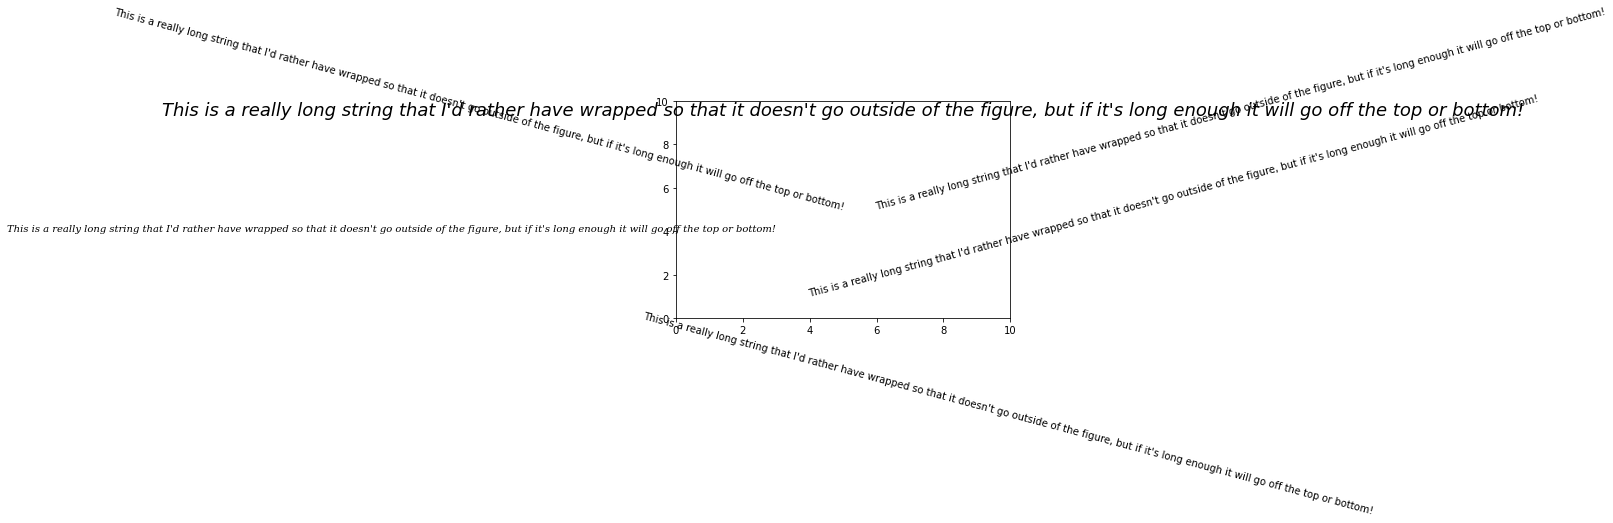

In [ ]:
2fig = plt.figure()
plt.axis([0, 10, 0, 10])
t = ("This is a really long string that I'd rather have wrapped so that it "
     "doesn't go outside of the figure, but if it's long enough it will go "
     "off the top or bottom!")
plt.text(4, 1, t, ha='left', rotation=15, wrap=True)
plt.text(6, 5, t, ha='left', rotation=15, wrap=True)
plt.text(5, 5, t, ha='right', rotation=-15, wrap=True)
plt.text(5, 10, t, fontsize=18, style='oblique', ha='center',
         va='top', wrap=True)
plt.text(3, 4, t, family='serif', style='italic', ha='right', wrap=True)
plt.text(-1, 0, t, ha='left', rotation=-15, wrap=True)

plt.show()

# Similarity Visualizations

In [ ]:
data.head(10)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,num_ingredients
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,4
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,3
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North,6
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West,10
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East,8
5,Imarti,"Sugar syrup, lentil flour",vegetarian,10,50,sweet,dessert,West Bengal,East,2
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North,9
7,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,Unknown State,-1,4
8,Kalakand,"Milk, cottage cheese, sugar",vegetarian,20,30,sweet,dessert,West Bengal,East,3
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,Unknown State,-1,4


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
all_ingredients = data[data['flavor_profile']=='sweet']['ingredients'].apply(lambda x:[i.lower().strip() for i in x.split(',')])
#all_ingredients = [i.lower().strip() for i in all_ingredients]

In [ ]:
cv = CountVectorizer()
x = cv.fit_transform(data[data['flavor_profile']=='sweet']['ingredients'].tolist())

In [ ]:
x = x.toarray()

In [ ]:
sim_score = np.corrcoef(x)

In [ ]:
print(sim_score.shape)

(88, 88)


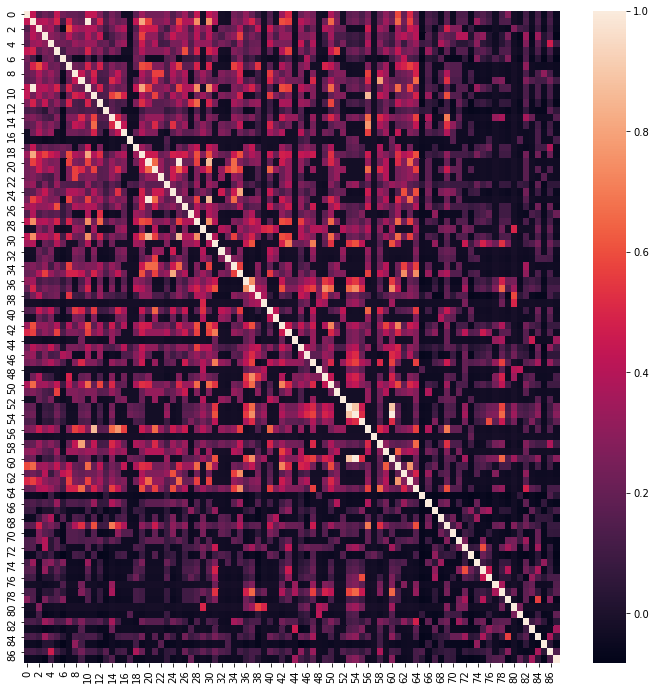

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(sim_score)
plt.show()

In [ ]:
sim_score = np.zeros((x.shape[0], x.shape[0]), np.float32)
for i in range(x.shape[0]):
  for j in range(x.shape[0])
    sim_score[i, j] = x[i, :]*x[j:]

(255, 336)

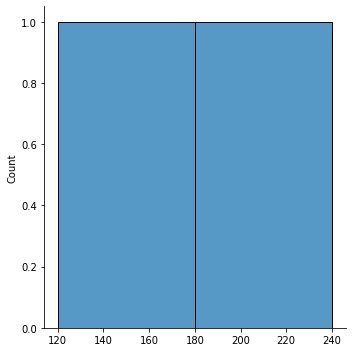

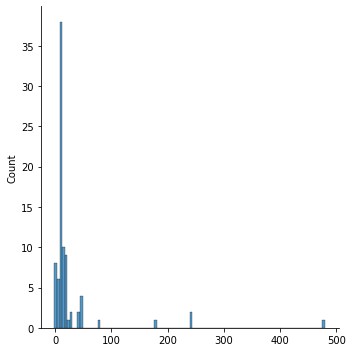

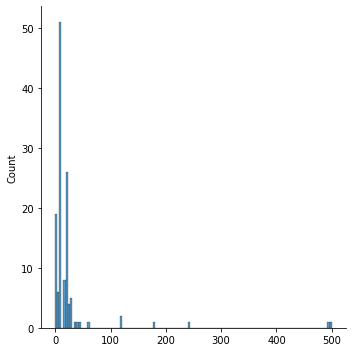

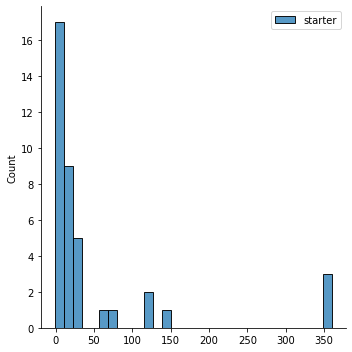

In [ ]:
c_lst = set(data['course'].tolist())
for i in c_lst:
  sns.displot(data[data['course']==i]['prep_time'].tolist())
plt.legend(list(c_lst))
plt.show()

In [ ]:
data[data['prep_time']<1]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,num_ingredients
19,Sohan papdi,"Gram flour, ghee, sugar, milk, cardamom",vegetarian,-1,60,sweet,dessert,Maharashtra,West,5
21,Chhena kheeri,"Chhena, sugar, milk",vegetarian,-1,60,sweet,dessert,Odisha,East,3
65,Pork Bharta,"Boiled pork, onions, chillies, ginger and garlic",non vegetarian,-1,-1,spicy,main course,Tripura,North East,4
132,Kaara kozhambu,"Sesame oil, drumstick, tamarind paste, sambar ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South,5
134,Keerai masiyal,"Urad dal, curry leaves, sugar, mustard seeds, ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South,5
148,Paravannam,"Raw rice, jaggery, milk",vegetarian,-1,-1,spicy,main course,Kerala,South,3
152,Poriyal,"Chana dal, urad dal, beans, coconut, mustard",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South,5
167,Kolim Jawla,"Baingan, fish, coconut oil, fresh coconut, ginger",non vegetarian,-1,-1,spicy,main course,Maharashtra,West,5
172,Bombil fry,"Bombay duck, malvani masala, rice flour, bomba...",non vegetarian,-1,-1,spicy,main course,Maharashtra,West,5
185,Ghooghra,"Dry fruits, semolina, all purpose flour",vegetarian,-1,-1,spicy,snack,Gujarat,West,3


In [ ]:
data['num_ingredients'] = data['ingredients'].apply(lambda x:len(x.split(',')))

In [ ]:
data[data['prep_time']==-1]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,num_ingredients
19,Sohan papdi,"Gram flour, ghee, sugar, milk, cardamom",vegetarian,-1,60,sweet,dessert,Maharashtra,West,5
21,Chhena kheeri,"Chhena, sugar, milk",vegetarian,-1,60,sweet,dessert,Odisha,East,3
65,Pork Bharta,"Boiled pork, onions, chillies, ginger and garlic",non vegetarian,-1,-1,spicy,main course,Tripura,North East,4
132,Kaara kozhambu,"Sesame oil, drumstick, tamarind paste, sambar ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South,5
134,Keerai masiyal,"Urad dal, curry leaves, sugar, mustard seeds, ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South,5
148,Paravannam,"Raw rice, jaggery, milk",vegetarian,-1,-1,spicy,main course,Kerala,South,3
152,Poriyal,"Chana dal, urad dal, beans, coconut, mustard",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South,5
167,Kolim Jawla,"Baingan, fish, coconut oil, fresh coconut, ginger",non vegetarian,-1,-1,spicy,main course,Maharashtra,West,5
172,Bombil fry,"Bombay duck, malvani masala, rice flour, bomba...",non vegetarian,-1,-1,spicy,main course,Maharashtra,West,5
185,Ghooghra,"Dry fruits, semolina, all purpose flour",vegetarian,-1,-1,spicy,snack,Gujarat,West,3


In [ ]:
data[data['cook_time']!=-1].groupby(['flavor_profile', 'course', 'diet'])['cook_time'].median()
#data[data['diet']=='non vegetarian']

flavor_profile  course       diet          
Unknown Flavor  main course  non vegetarian    25.0
                             vegetarian        25.0
                snack        vegetarian        37.5
bitter          main course  vegetarian        40.0
                snack        vegetarian        30.0
sour            main course  vegetarian        10.0
spicy           main course  non vegetarian    40.0
                             vegetarian        30.0
                snack        vegetarian        30.0
                starter      non vegetarian    37.5
sweet           dessert      vegetarian        30.0
                main course  vegetarian        60.0
Name: cook_time, dtype: float64